In [525]:
# Importing the required libraries
import pandas as pd
import itertools
import time
import numpy as np
import yfinance as yf
from pycoingecko import CoinGeckoAPI
from datetime import datetime as dt,timedelta


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pylab import rcParams

import glob # To read all csv files in the directory
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from urllib.request import urlretrieve
import requests
from bs4 import BeautifulSoup
from html import unescape
from tqdm import tqdm
import os, glob, zipfile
import json
import re
import warnings
from sklearn.svm import SVC

# plotting
from chart_studio import plotly
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
plt.style.use("ggplot")

# exploratory analysis
import scipy.stats as st

# modelling
from sklearn.model_selection import train_test_split, validation_curve, cross_validate, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
import xgboost as xgb
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
#from lightgbm import LGBMClassifier
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
rcParams['figure.figsize'] = 12,5
plt.style.use('seaborn')
%matplotlib inline

In [5]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('ico_orginal.csv')], ignore_index = True)

In [6]:
df.columns

Index(['id', 'success', 'tokenNum', 'teamSize', 'country', 'categories',
       'overallrating', 'offered_ownership', 'enddate', 'startdate',
       'tokenName', 'tokenPrice', 'tokenType', 'platform', 'acceptingCurrency',
       'softcap', 'hardcap', 'whitepaper', 'video', 'socialMedia'],
      dtype='object')

In [7]:
df_org = (
    pd.read_csv("ico_orginal.csv",parse_dates=['startdate','enddate'],dayfirst=True)
    .set_index('id', verify_integrity=True)
)

In [318]:
print(df_org.isnull().sum())

success                0
tokenNum             247
teamSize               0
country                0
categories             0
overallrating          0
offered_ownership    541
enddate                0
startdate              5
tokenName             32
tokenPrice           182
tokenType            458
platform             131
acceptingCurrency    227
softcap               29
hardcap               29
whitepaper            29
video                 29
socialMedia           29
dtype: int64


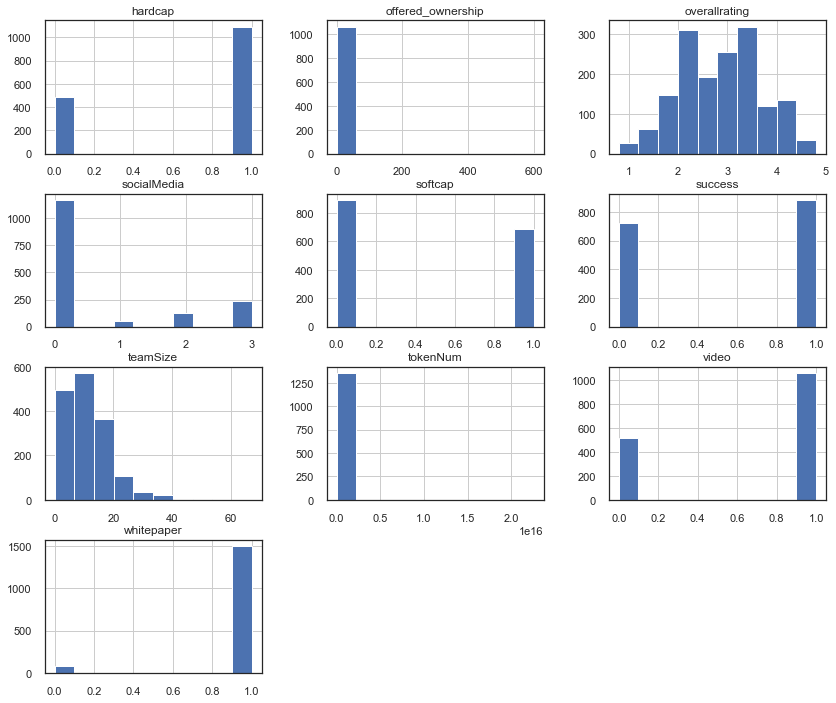

In [305]:
# Checking the distributions of continuous features after cleaning
df_org[df_org.describe().columns].hist(figsize=(14,12));

# 1. *********DATA UNDERSTANDING**************8

In [9]:
raw_df = (
    pd.read_csv("ico_orginal.csv",parse_dates=['startdate','enddate'],dayfirst=True)
    .set_index('id', verify_integrity=True)
)
#print(raw_df['enddate'].head(10),raw_df['startdate'].head(10))

In [68]:
cntry=raw_df.loc[(raw_df['country']=='UK') & (raw_df['tokenPrice']<3),'tokenPrice']
cntry1=raw_df.loc[raw_df['country']=='United States','tokenPrice']
#print(cntry1)
print(cntry1.median(skipna = True))

0.4534184265136719


In [10]:
#Before we proceed with the visualizations, let us first see a statistical summary of our numerical ldataset:
with pd.option_context('float_format', '{:6.2f}'.format):
    display(raw_df.describe())

,success,tokenNum,teamSize,overallrating,offered_ownership,softcap,hardcap,whitepaper,video,socialMedia
count,1606.00,1359.00,1606.00,1606.00,1065.00,1577.00,1577.00,1577.00,1577.00,1577.00
mean,0.55,20152680654366.00,11.17,2.85,1.14,0.44,0.69,0.95,0.67,0.64
std,0.50,626466565998403.00,8.04,0.82,18.41,0.50,0.46,0.22,0.47,1.13
min,0.00,0.00,0.00,0.80,0.01,0.00,0.00,0.00,0.00,0.00
25%,0.00,7000000.00,6.00,2.30,0.45,0.00,0.00,1.00,0.00,0.00
50%,1.00,55000000.00,10.00,2.80,0.60,0.00,1.00,1.00,1.00,0.00
75%,1.00,251480400.00,15.00,3.50,0.74,1.00,1.00,1.00,1.00,1.00
max,1.00,22600000000000000.00,67.00,4.80,601.25,1.00,1.00,1.00,1.00,3.00


In [12]:
#Before we proceed with the visualizations, let us first see a statistical summary of our catergorical dataset:
with pd.option_context('float_format', '{:6.2f}'.format):
    display(raw_df[['country','categories','tokenName','tokenType','platform','acceptingCurrency']].describe(include = 'object'))

,country,categories,tokenName,tokenType,platform,acceptingCurrency
count,1606,1606,1574,1148,1475,1379
unique,117,696,1492,43,63,234
top,USA,Cryptocurrency,CBC,ERC20,Ethereum,ETH
freq,261,97,4,1061,1307,722


### ***Distribution of Numerical Features***

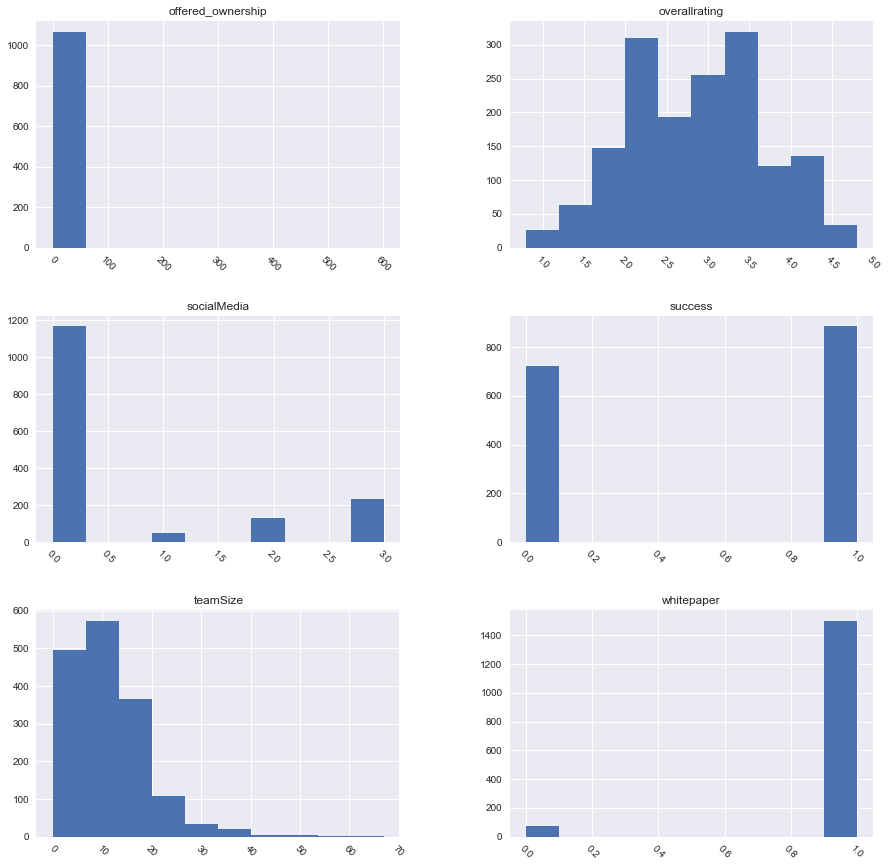

In [13]:
# Plot histogram grid
import matplotlib.pyplot as plt
raw_df[['success','teamSize','whitepaper','overallrating','offered_ownership','socialMedia']].hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

### ***bar plots for catergorical variables***
top 15 largest countries witn number of proejcts 

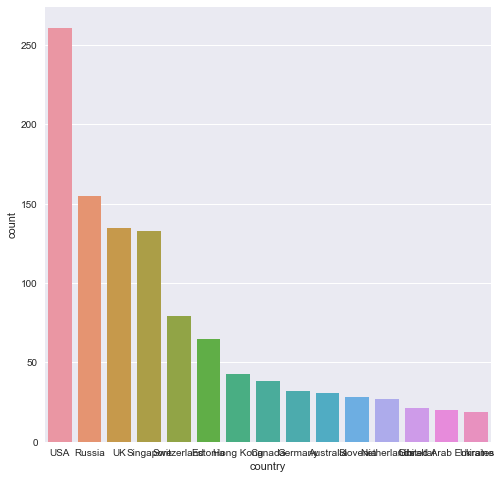

In [14]:
plt.figure(figsize=(8,8))
import seaborn as sns 
sns.countplot(x='country',data=raw_df,order=pd.value_counts(raw_df['country']).iloc[:15].index)


### top 10 categories 

Text(0.5, 1.0, 'categories')

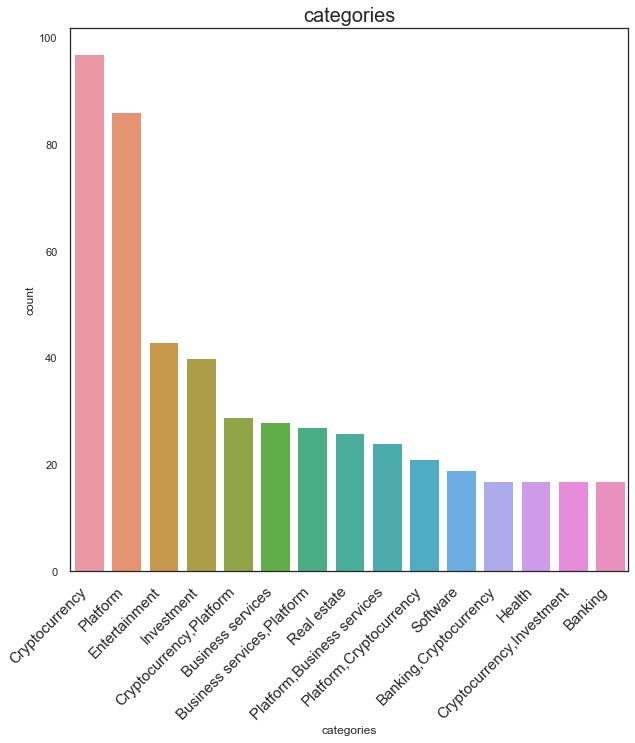

In [310]:
plt.figure(figsize=(10,10))
import seaborn as sns
chart=sns.countplot(x='categories',data=raw_df,order=pd.value_counts(raw_df['categories']).iloc[:15].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=15)
plt.title('categories',fontsize=20)

***Correlations***
Finally, let's take a look at the relationships between numeric features and other numeric features.
Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.
Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
Correlations near -1 or 1 indicate a strong relationship.
Those closer to 0 indicate a weak relationship.
0 indicates no relationship.

### correlation  plot 

In [316]:
raw_df.corr()

,success,tokenNum,teamSize,overallrating,offered_ownership,softcap,hardcap,whitepaper,video,socialMedia
success,1.000000,0.034204,0.322506,0.465720,-0.033969,0.024555,0.088688,0.056086,0.273569,0.318840
tokenNum,0.034204,1.000000,-0.010665,-0.003872,-0.001170,0.024310,-0.039380,0.007059,0.023103,-0.017165
teamSize,0.322506,-0.010665,1.000000,0.573844,0.017642,0.141190,0.210593,0.128280,0.338765,0.226314
overallrating,0.465720,-0.003872,0.573844,1.000000,-0.003620,0.209235,0.312011,0.303481,0.497953,0.350988
offered_ownership,-0.033969,-0.001170,0.017642,-0.003620,1.000000,-0.031176,0.017360,0.004034,0.019905,-0.018532
softcap,0.024555,0.024310,0.141190,0.209235,-0.031176,1.000000,0.458212,0.097904,0.107578,-0.025243
hardcap,0.088688,-0.039380,0.210593,0.312011,0.017360,0.458212,1.000000,0.129172,0.149214,0.008631
whitepaper,0.056086,0.007059,0.128280,0.303481,0.004034,0.097904,0.129172,1.000000,0.143019,0.046785
video,0.273569,0.023103,0.338765,0.497953,0.019905,0.107578,0.149214,0.143019,1.000000,0.155650
socialMedia,0.318840,-0.017165,0.226314,0.350988,-0.018532,-0.025243,0.008631,0.046785,0.155650,1.000000


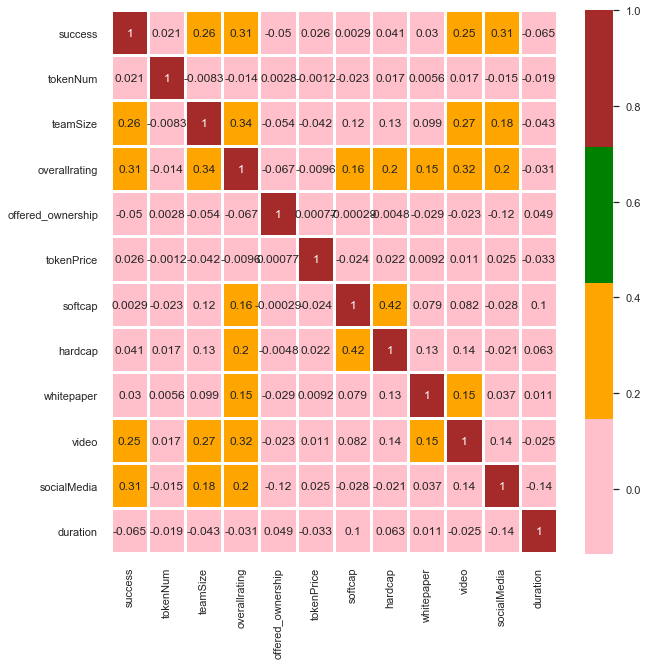

In [411]:
from matplotlib.colors import ListedColormap
mask=np.zeros_like(df_transformed.corr())
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df_transformed.corr(), mask=mask, annot=True, lw=2, cmap=ListedColormap(['pink', 'orange', 'green','brown']))

# 2.  ***data preparation***

***create duration column***

In [351]:
#create new column duration
raw_df['duration'] = (raw_df['enddate'] - raw_df['startdate']).dt.days
#raw_df['duration'] = np.nan_to_num(raw_df['duration']).astype(int)
print(raw_df['duration'])
s=raw_df.loc[raw_df['duration']<0,'duration']
print(s)

id
1       45.0
2       31.0
3        5.0
4       31.0
5       26.0
        ... 
1602    89.0
1603     7.0
1604    31.0
1605    27.0
1606    31.0
Name: duration, Length: 1606, dtype: float64
id
130    -15.0
286    -20.0
363    -30.0
534     -2.0
1080   -61.0
1129    -7.0
Name: duration, dtype: float64


#### create launch day and launch month columns from start date

In [170]:
dframe['launch_day'] = pd.to_datetime(dframe['startdate'],'%YYYY-%MM-%DD').dt.day_name()

In [ ]:
dframe['launch_month'] = pd.to_datetime(dframe['startdate'],'%YYYY-%MM-%DD').dt.month_name()

### ***create total_fund column***

In [4]:
def get_curr_prices(enddate,curr):
    date=enddate
    if enddate.weekday()==5 or enddate.weekday()==6:
        date=str((enddate-timedelta(days=2)).date())
    ticker=curr_dict[curr]
    data=yf.download(ticker,start=date,end=date,group_by="ticker")
    close_price=data['Close'].iloc[0]
    return close_price

In [5]:
def get_coin_prices(enddate,token):
    timestamp=(enddate-dt(1970,1,1,0,0,0)).total_seconds()
    token_id=coins_dict[token]
    #print(token_id)
    #print(timestamp)
    #print(timestamp+86400)
    cg=CoinGeckoAPI()
    info=cg.get_coin_market_chart_range_by_id(token_id,"usd",timestamp,timestamp+86400)
    #print(token_id)
    #print(info)
    close_price=info["prices"][1][1]
    return close_price


In [6]:
coins_dict={"ETP":"metaverse-etp","NEO":"neo","XEM":"nem","XLM":"stellar","WAVE":"waves","WAVES":"waves","QTUM":"qtum"}
curr_dict={"ETH":"ETH-USD","BTC":"BTC-USD","EUR":"EURUSD=X","EURO":"EURUSD=X","CAD":"CADUSD=X","CHF":"CHFUSD=X","KRW":"KRWUSD=X"}
currencies=["USD","ETH","ETHER","ETP","EUR","EURO","CAD","RMB","BTC","BITCOIN","NEO","XEM","CHF","GOLD","XLM","WAVE","QTUM","LAND","KRW","MBTC"]

In [7]:
def text_x(price):
    if price=="text":
        price=np.nan
    return price

In [8]:
def fix_price(name,price,enddate,currencies):
    br=False
    cl=False
    if not pd.isnull(price):
        if "$" in price:
            price=price.replace("$","USD")
        price=str(price).upper()
        if "BITCOIN" in price:
            price=price.replace("BITCOIN","BTC")
        if "<BR>" in price:
            br=True
            price="=".join(price.split("<BR>"))
        if ";" in price:
            cl=True
            price="=".join(price.split(";"))
        if "=" in price:
            split=price.split("=")
            match=[i for c in currencies for i in split if c in i]
            if not br and not cl:
                if match[0]!=split[-1]:
                    split.remove(match[0])
                    split.append(match[0])
            else:
                index=split.index(match[0])
                if index==1 or index==3:
                    split=split[index-1:index+1]
                if index==0 or index==2:
                    split=split[index:index+2]
            split=[i.strip(" ") for i in split]
            split=[("".join(i for i in split[0] if not i.isalpha())).strip(" "),split[1]]
            split=[split[0].split(" "),split[1]]
            split=["".join([split[0][i] for i in range(len(split[0])) if (len(split[0][i])>1 or (i==0) or (split[0][i]=="-"))]),split[1]]
            split=["".join(i for i in split[0] if i!=","),split[1]]
            if split[0]=='':
                split=['1',split[1]]
            if '-' in split[0]:
                vals=[split[0].split("-")[0],split[0].split("-")[1]]
                fill=(float(vals[0])+float(vals[1]))/2
                split=[str(fill),split[1]]
            split=[float(split[0]),split[1]]
        else:
            split=[1,price]
        print(split)
        print(name)
        match_c=[c for c in currencies if c in split[1]]
        if match_c==['BTC','MBTC']:
            match_c=['MBTC'] #mbtc includes btc have to code separately
        split=[split[0],split[1].replace(match_c[0],"")]
        split.append(match_c[0])
        split=[split[0],split[1].strip(" "),split[2].strip(" ")]
        if "," in split[1]:
            split=[split[0],split[1].replace(",","."),split[2]]
        if '-' in split[1]:
            vals=[split[1].split("-")[0].strip(" "),split[1].split("-")[1].strip(" ")]
            fill=(float(vals[0]) + float(vals[1]))/2
            split=[split[0],str(fill),split[2]]
        split=[split[0],float(split[1]),split[2]]
        split=[split[0],split[1]/split[0],split[2]]
        if split[2] in curr_dict.keys():
            close_price=get_curr_prices(enddate,split[2])
        else:
            if split[2]=='USD':
                close_price=1
            else:
                if split[2] in coins_dict.keys():
                    close_price=get_coin_prices(enddate,split[2])
                else:
                    close_price=0
        price=split[1]*close_price
        #print("{0}:1 token={1} USD".format(split,price))
    return price

In [9]:
raw_df["tokenPrice"]=raw_df["tokenPrice"].apply(lambda x:text_x(x))
raw_df["tokenPrice"]=raw_df.apply(lambda x:fix_price(x.tokenName,x.tokenPrice,x.enddate,currencies),axis=1)

[1.0, '1 USD']
REDLcoin
[1.0, '0.0001 ETH']
SLOGN
[*********************100%***********************]  1 of 1 completed
[1.0, '0.00005 ETH']
TNB
[*********************100%***********************]  1 of 1 completed
[1.0, '0.00969635 USD']
GIF
[4440.0, '1 ETH']
AIRE
[*********************100%***********************]  1 of 1 completed
[8000.0, '1 ETH']
WPR
[*********************100%***********************]  1 of 1 completed
[1.0, '0.05 USD']
CBC
[500.0, '1 ETH']
SPIN
[*********************100%***********************]  1 of 1 completed
[1.0, '0.1 USD']
CAS
[500.0, '1 ETH']
BKX
[*********************100%***********************]  1 of 1 completed
[1.0, '0.01 ETH']
CCT
[*********************100%***********************]  1 of 1 completed
[800.0, '1 ETH']
BNS
[*********************100%***********************]  1 of 1 completed
[1800.0, '1 ETH']
BIX
[*********************100%***********************]  1 of 1 completed
[1.0, '7.5 USD']
MTK
[1000.0, '1 ETH']
HYD
[*********************100%***********

[*********************100%***********************]  1 of 1 completed
[1.0, '0.043 USD']
TKY
[1.0, '0.01 USD']
SHPING
[1.0, '0.20 USD']
GTT
[13941.0, '1 ETH']
WYS
[*********************100%***********************]  1 of 1 completed
[1.0, '0.001524832994 - 0.001778971827 ETH']
GET
[*********************100%***********************]  1 of 1 completed
[1.0, '0.01 ETH']
MAT
[*********************100%***********************]  1 of 1 completed
[1.0, '0.24 USD']
CRNC
[1.0, '0.70 EUR']
USH
[*********************100%***********************]  1 of 1 completed
[264340.0, '1 BTC']
NEWS
[*********************100%***********************]  1 of 1 completed
[1000000.0, '1 ETH']
PNG
[*********************100%***********************]  1 of 1 completed
[2500.0, '1 ETH']
BERRY
[*********************100%***********************]  1 of 1 completed
[30310.0, '1 ETH']
NIC
[*********************100%***********************]  1 of 1 completed
[1.0, '0.000005 ETH']
PIB
[*********************100%*********************

[*********************100%***********************]  1 of 1 completed
[1.0, '0.000142857 ETH']
OPL
[*********************100%***********************]  1 of 1 completed
[3383.0, '1 ETH']
BWT
[*********************100%***********************]  1 of 1 completed
[1.0, '0,12 USD']
STRN
[2000.0, '1 ETH']
VCB
[*********************100%***********************]  1 of 1 completed
[800.0, '1 ETH']
UTT
[*********************100%***********************]  1 of 1 completed
[1.0, '2 USD']
FIN
[1.0, '0.5 - 0.6 USD']
BBRT
[2000.0, '1 ETH']
SED
[*********************100%***********************]  1 of 1 completed
[1000.0, '1 ETH']
GYM
[*********************100%***********************]  1 of 1 completed
[10000.0, '1 ETH']
GRD
[*********************100%***********************]  1 of 1 completed
[1.0, '0.01 EUR']
WZI
[*********************100%***********************]  1 of 1 completed
[1.0, '0.0001111111 ETH']
TND
[*********************100%***********************]  1 of 1 completed
[10000.0, '1 ETH']
BDG
[***

[*********************100%***********************]  1 of 1 completed
[1.0, '1 USD']
SMNX
[4000.0, '1 ETH']
DTX
[*********************100%***********************]  1 of 1 completed
[1.0, '0.20 EUR']
MCR
[*********************100%***********************]  1 of 1 completed
[1.0, '0.20 USD']
EPT
[1.0, '0.0221 USD']
iLT
[3000.0, '1 ETH']
TRIBE
[*********************100%***********************]  1 of 1 completed
[3000.0, '1 ETH']
HST
[*********************100%***********************]  1 of 1 completed
[1.0, 'USD1']
PRO
[1000.0, '1 USD']
LMN
[4000.0, '1 ETH']
NTO
[*********************100%***********************]  1 of 1 completed
[1.0, '0.15 USD']
LXT
[1.0, '0.00061 ETH']
GLET
[*********************100%***********************]  1 of 1 completed
[1.0, '0.25 USD']
VPE
[130.0, '1 ETH']
BKRx
[*********************100%***********************]  1 of 1 completed
[1.0, '0.0258 USD']
TSP
[1500.0, '1 ETH']
BFT
[*********************100%***********************]  1 of 1 completed
[1.0, '0.50 USD']
VIOX


[*********************100%***********************]  1 of 1 completed
[1.0, '1 USD']
FINS
[1.0, '0.07 USD']
AHC
[1.0, '0.10 USD']
FLUZ
[1.0, '0.1125 USD']
FT
[1.0, '0.001ETH']
MDTK
[*********************100%***********************]  1 of 1 completed
[480.0, '1 ETH']
ART
[*********************100%***********************]  1 of 1 completed
[1.0, '0.002 ETH']
BZT
[*********************100%***********************]  1 of 1 completed
[1.0, '0.0005 BTC']
TFL
[*********************100%***********************]  1 of 1 completed
[15000.0, '1 BTC']
BCY
[*********************100%***********************]  1 of 1 completed
[200.0, '1 ETH']
HERO
[*********************100%***********************]  1 of 1 completed
[2500.0, '1 ETH']
BUX
[*********************100%***********************]  1 of 1 completed
[1000.0, '1 ETH']
CBT
[*********************100%***********************]  1 of 1 completed
[1.0, '1.00 USD']
KNW
[1.0, '1 EUR']
BTQ
[*********************100%***********************]  1 of 1 completed
[

[*********************100%***********************]  1 of 1 completed
[1.0, '0.15 ETH']
FIB
[*********************100%***********************]  1 of 1 completed
[1.0, '0.08 USD']
ARNA
[10000.0, '1 ETH']
MIND
[*********************100%***********************]  1 of 1 completed
[4750.0, '1 ETH']
LST
[*********************100%***********************]  1 of 1 completed
[27562.0, '5 ETH']
NEN
[*********************100%***********************]  1 of 1 completed
[1.0, '0.00055 ETH']
BACE
[*********************100%***********************]  1 of 1 completed
[5000.0, '1 ETH']
ANNA
[*********************100%***********************]  1 of 1 completed
[1.0, '100 EUR']
XGM
[*********************100%***********************]  1 of 1 completed
[15000.0, '1 ETH']
LDC
[*********************100%***********************]  1 of 1 completed
[7000.0, '1 ETH']
BBX
[*********************100%***********************]  1 of 1 completed
[1500.0, '1 ETH']
WAX
[*********************100%***********************]  1 of 1 

[*********************100%***********************]  1 of 1 completed
[1.0, '2 USD']
MHRA
[1.0, '0.001 ETH']
TDN
[*********************100%***********************]  1 of 1 completed
[10.0, '1 ETH']
RST
[*********************100%***********************]  1 of 1 completed
[1.0, '2 USD']
HMT
[1.0, '0.50 USD']
ITC
[1.0, '1 USD']
ROCK2
[1.0, '0.9 - 2 USD']
BITCAP
[1000.0, '1 ETH']
RLS
[*********************100%***********************]  1 of 1 completed
[3000.0, '1 ETH']
KC
[*********************100%***********************]  1 of 1 completed
[625.0, '1 ETH']
ENT
[*********************100%***********************]  1 of 1 completed
[1.0, '0.05 USD']
WIN
[1300.0, '1 ETH']
GOL
[*********************100%***********************]  1 of 1 completed
[2200.0, '0.1 BTC']
DAC
[*********************100%***********************]  1 of 1 completed
[100.0, '1 ETH']
FAME
[*********************100%***********************]  1 of 1 completed
[1.0, '0.001 ETH']
Drivero
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed
[1.0, '0.4 USD']
REC
[1.0, '0.025 USD']
TAU
[1.0, '0.0003 ETH']
ADSi
[*********************100%***********************]  1 of 1 completed
[1.0, '1USD']
ZVD
[1.0, '0.01 USD']
DGTX
[1.0, '1 USD']
HISK
[1500.0, '1 ETH']
VIN
[*********************100%***********************]  1 of 1 completed
[2500.0, '1 ETH']
SMT
[*********************100%***********************]  1 of 1 completed
[1.0, '1 USD']
iJproject
[1000.0, '1 NEO']
RPX
[1.0, '0.00009 ETH']
Libidocoin
[*********************100%***********************]  1 of 1 completed
[1.0, '10 USD']
PLBT
[1000.0, '1 ETH']
HIT
[*********************100%***********************]  1 of 1 completed
[1000.0, '1 ETH']
ET4
[*********************100%***********************]  1 of 1 completed
[1.0, '0.2 USD']
VAS
[5000.0, '1 ETH']
PLNS
[*********************100%***********************]  1 of 1 completed
[1500000.0, '1 ETH']
UTS
[*********************100%***********************]  1 of 1 co

In [37]:
raw_df['total_fund']=raw_df["tokenPrice"]*raw_df["tokenNum"]

#### save the dataframe to csv

In [38]:
raw_df.to_csv('ICO_dataset_delta.csv')

#### **Imputation and cleaning ***    

##### ICO_dataset_delta.csv cleaned manually, we now create new total_fund and day,month of startdate

In [407]:
dframe = (
    pd.read_csv("ICO_dataset_delta.csv",parse_dates=['startdate','enddate'],dayfirst=True)
    .set_index('id', verify_integrity=True)
)

In [408]:
dframe['total_fund']=dframe["tokenPrice"]*dframe["tokenNum"]
dframe['start_day'] = pd.to_datetime(dframe['startdate'],'%YYYY-%MM-%DD').dt.day_name()
dframe['start_month'] = pd.to_datetime(dframe['startdate'],'%YYYY-%MM-%DD').dt.month_name()

In [409]:
with pd.option_context('float_format', '{:6.2f}'.format):
    display(dframe.describe())

,success,tokenNum,teamSize,overallrating,offered_ownership,tokenPrice,softcap,hardcap,whitepaper,video,socialMedia,duration,total_fund
count,1427.00,1427.00,1427.00,1427.00,1427.00,1427.00,1427.00,1427.00,1427.00,1427.00,1427.00,1427.00,1427.00
mean,0.62,3354948758073.20,12.36,2.91,0.58,10.85,0.44,0.72,0.96,0.70,0.67,39.95,3344549864044.84
std,0.49,126272030235151.06,7.61,0.81,0.17,214.83,0.50,0.45,0.20,0.46,1.15,30.17,126271761523229.52
min,0.00,1.00,1.00,0.80,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,22901250.00,7.00,2.30,0.50,0.10,0.00,0.00,1.00,0.00,0.00,27.00,6774299.92
50%,1.00,78000000.00,11.00,2.90,0.60,0.33,0.00,1.00,1.00,1.00,0.00,31.00,23249928.71
75%,1.00,246250000.00,16.00,3.50,0.67,1.00,1.00,1.00,1.00,1.00,1.00,49.00,67154869.62
max,1.00,4770000000000000.00,67.00,4.80,1.00,7724.37,1.00,1.00,1.00,1.00,3.00,382.00,4770000000000000.00


In [356]:
print(dframe.isnull().sum())
#print(df[df.offered_ownership.isnull()])
dframe.dtypes

success                0
tokenNum               0
teamSize               0
country                0
categories             0
overallrating          0
offered_ownership      0
enddate                0
startdate              0
tokenName             25
tokenPrice             0
tokenType            401
platform               0
acceptingCurrency      0
softcap                0
hardcap                0
whitepaper             0
video                  0
socialMedia            0
duration               0
total_fund             0
start_day              0
start_month            0
dtype: int64


success                       int64
tokenNum                    float64
teamSize                      int64
country                      object
categories                   object
overallrating               float64
offered_ownership           float64
enddate              datetime64[ns]
startdate            datetime64[ns]
tokenName                    object
tokenPrice                  float64
tokenType                    object
platform                     object
acceptingCurrency            object
softcap                       int64
hardcap                       int64
whitepaper                    int64
video                         int64
socialMedia                   int64
duration                      int64
total_fund                  float64
start_day                    object
start_month                  object
dtype: object

###### ownership column box plot to check outliers

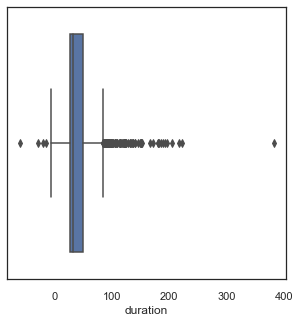

In [352]:
plt.figure(figsize=(5,5))
sns.boxplot(raw_df.duration)

In [82]:
#offered_ownership has one extreme value with value 601.25 lets remove it 
dframe.offered_ownership.sort_values(ascending=False).head()

id
432     1.0
1332    1.0
1427    1.0
1587    1.0
380     1.0
Name: offered_ownership, dtype: float64

#dframe = dframe[dframe.offered_ownership <600 ]
1. done manually assigned 0.6(median value) for extreme value 
2. for null value assigned median value of the column

###### duration column box plot to check outliers

In [84]:
dframe.duration.sort_values(ascending=True).head()

id
1188    0.0
1117    0.0
202     0.0
1493    0.0
1206    0.0
Name: duration, dtype: float64

In [85]:
dframe.duration.sort_values(ascending=False).head()

id
542     382.0
1433    222.0
1567    217.0
208     204.0
1154    196.0
Name: duration, dtype: float64

#as you see there few outliers with duration. we saw negative values because startend is greater than enddate.
#there are only 5 such records with negative duration. we have removed these records and also removed where duration is >300 
#which is our extreme outlier.

#dframe = dframe[dframe.duration >=0]
1.done manually made days positive looks dates are reversed
2.for null start dates assigned enddate -average duration days

#### total_fund column box plot to check outliers

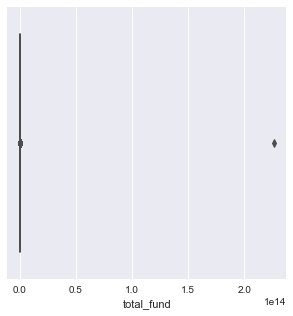

In [71]:
plt.figure(figsize=(5,5))
sns.boxplot(dframe.total_fund)

In [72]:
dframe.total_fund.sort_values(ascending=False).head()

id
552     2.260000e+14
64      3.637510e+11
1218    2.894760e+10
106     1.091200e+10
131     7.267500e+09
Name: total_fund, dtype: float64

#### box plot for softcap,hardcap, whitepaper socialmedia

1.fill the softcap,hardcap, whitepaper, video, social media with most frequent value

#### token number and teamsize####

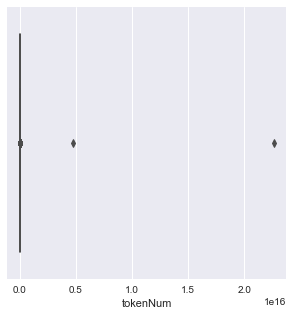

In [94]:
plt.figure(figsize=(5,5))
sns.boxplot(dframe.tokenNum)

1.tokennum and teamsize=0 removed rows
2.teamsize=0 assigned mean value-------------justify give ref
3.tokennum=null assigned median based on each country
4. tokennum=0 ------pending

#### platform and accepting currency####

1. platform = null assgined ETH and BTC based on token type, if both are null default assigned ETH
2. accepting currency=null ,assigned ETH,BTC etc basd on platform

#### token prize column 

1. we converted each token price in terms of usd value by using CoinGeckoAPI and yfinance API using python.
for example 1 ETH = 8,000 WPR, we first convert how many ETH in one WPR i,e 1 WPR=1/8000 = 0.000125 ETH and then we use above API's to find 1 ETH is how much in USD price.
2. for token price which are null, we assinged mean value of token prize from each country after above step process 

#### token name and token type columns

1. token name is not an important variable because all are distinct,just like projects having its own name.
2. token type is heavily based upon on platform, we can use either platform or token type. so we will drop token type and use platform instead.

#### visualization after cleaning 

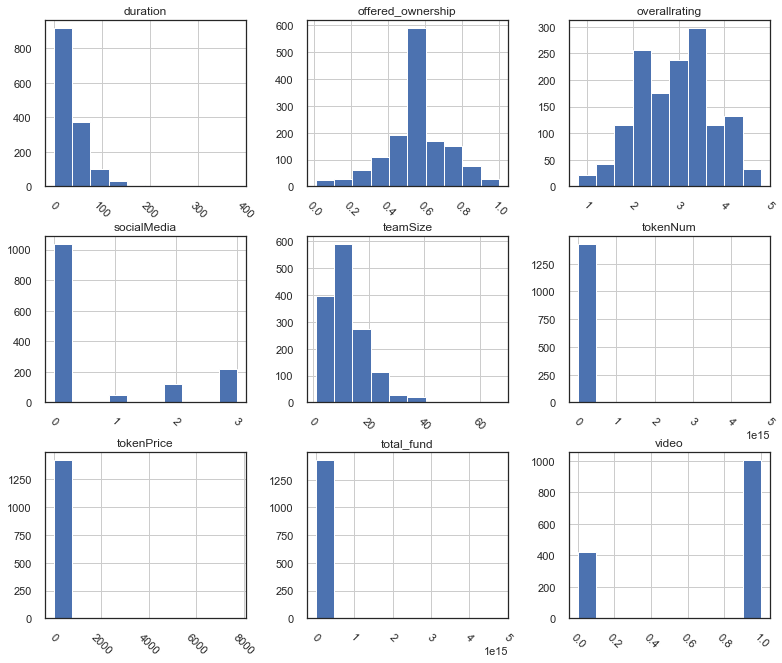

In [373]:
dframe[['video','tokenNum','duration','teamSize','overallrating','offered_ownership','socialMedia','total_fund','tokenPrice']].hist(figsize=(13,11), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

obeservations
1. for duration column,the plot is exponentially distrbibuted, as duration increase  number of projects reduce, it clearly shows investors show less interest when duration is above 50 days  
2. offered ownership and overallrating data is heavily skewed.
3. teamsize left skewed 

# 2. Modelling 

Preparing the data for machine learning
Some features were retained for EDA purposes, but now need to be dropped in order to use machine learning models.
This includes datetime features, features that are related to outcomes (e.g. the amount pledged and the number of backers) rather than related to the properties of the project itself (e.g. category, goal, length of campaign), categorical features which would result in too many one-hot encoded features (sub_category), and features that only have one category (is_starrable).

In [410]:
# Dropping columns and creating new dataframe
df_transformed = dframe.drop(['enddate', 'startdate', 'tokenName', 'tokenType','platform','total_fund'], axis=1)
df_transformed.head()

,success,tokenNum,teamSize,country,categories,overallrating,offered_ownership,tokenPrice,acceptingCurrency,softcap,hardcap,whitepaper,video,socialMedia,duration,start_day,start_month
id,,,,,,,,,,,,,,,,,
738,1,1.0,7,New Zealand,Cryptocurrency,3.6,0.40,0.446279,"BTC, ETH, LTC, DASH",1,1,1,1,0,28,Wednesday,February
1238,1,1.0,20,Singapore,"Cryptocurrency,Platform",3.3,0.12,0.023108,ETH,0,0,1,1,2,16,Wednesday,April
798,0,1.0,4,Spain,"Business services,Cryptocurrency,Legal",2.3,0.83,0.060614,"ETH, BTC, Fiat",0,0,1,1,0,97,Tuesday,January
432,0,1.0,17,New Zealand,"Communication,Cryptocurrency,Infrastructure,In...",2.8,1.00,0.020000,"ETH, BTC",0,1,1,0,0,61,Tuesday,March
38,1,1.0,10,India,"Cryptocurrency,Investment,Media,Software",4.3,0.72,0.030000,ETH,1,1,1,1,0,91,Thursday,March


Multi-collinearity will be checked for by assessing correlations between predictor features, as this can cause issues with some models. The multi-collinearity matrix below shows that this is not an issue:

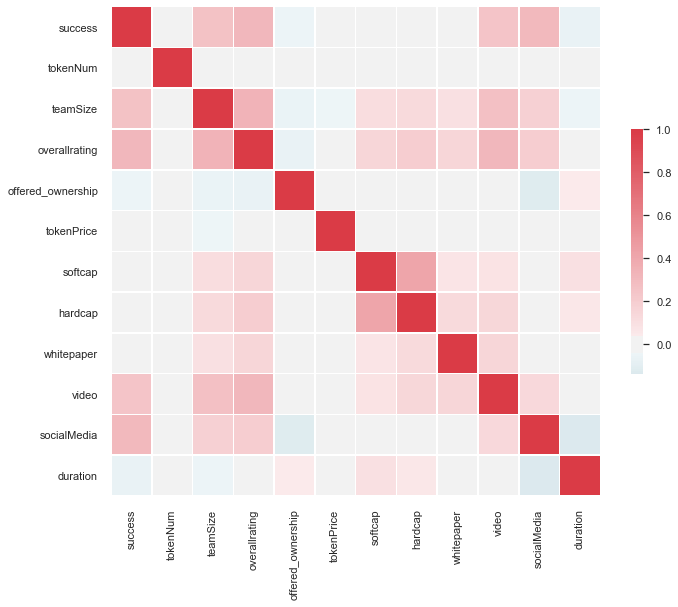

In [377]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df_transformed.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [415]:
# Dropping columns and creating new dataframe
df_transformed = dframe.drop(['enddate', 'startdate', 'tokenName', 'tokenType','platform','total_fund'], axis=1)
df_transformed.head()

# Creating dummy variables
df_transformed = pd.get_dummies(df_transformed)

#separate the dependent and independent features

X_unscaled = df_transformed.drop('success', axis=1)
y = df_transformed.success

# Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

,tokenNum,teamSize,overallrating,offered_ownership,tokenPrice,softcap,hardcap,whitepaper,video,socialMedia,duration,country_Afghanistan,country_Andorra,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Belarus,country_Belgium,country_Belize,country_Brazil,country_British Virgin Islands,country_Bulgaria,country_Cambodia,country_Canada,...,acceptingCurrency_VET,acceptingCurrency_Various,acceptingCurrency_WAVES,"acceptingCurrency_XEM, BTC, ETH, BCH, DASH, NEO, LTC, XRP, ETC",acceptingCurrency_XLM,"acceptingCurrency_XLM, ETH, BTC, LTC",start_day_Friday,start_day_Monday,start_day_Saturday,start_day_Sunday,start_day_Thursday,start_day_Tuesday,start_day_Wednesday,start_month_April,start_month_August,start_month_December,start_month_February,start_month_January,start_month_July,start_month_June,start_month_March,start_month_May,start_month_November,start_month_October,start_month_September
0,-0.026579,-0.704754,0.855590,-1.074263,-0.048445,1.134398,0.625171,0.209504,0.647997,-0.582768,-0.396200,-0.037463,-0.026481,-0.045899,-0.026481,-0.138873,-0.059297,-0.075085,-0.045899,-0.103069,-0.045899,-0.116165,-0.084007,-0.037463,-0.15386,...,-0.026481,-0.026481,-0.026481,-0.026481,-0.037463,-0.026481,-0.400203,-0.505032,-0.298853,-0.345276,-0.454153,-0.423484,2.407330,-0.357859,-0.228823,-0.313907,2.506115,-0.329818,-0.205832,-0.151456,-0.424634,-0.225411,-0.36898,-0.287578,-0.232195
1,-0.026579,1.005145,0.483243,-2.726302,-0.050416,-0.881525,-1.599564,0.209504,0.647997,1.158823,-0.794097,-0.037463,-0.026481,-0.045899,-0.026481,-0.138873,-0.059297,-0.075085,-0.045899,-0.103069,-0.045899,-0.116165,-0.084007,-0.037463,-0.15386,...,-0.026481,-0.026481,-0.026481,-0.026481,-0.037463,-0.026481,-0.400203,-0.505032,-0.298853,-0.345276,-0.454153,-0.423484,2.407330,2.794395,-0.228823,-0.313907,-0.399024,-0.329818,-0.205832,-0.151456,-0.424634,-0.225411,-0.36898,-0.287578,-0.232195
2,-0.026579,-1.099346,-0.757916,1.462796,-0.050241,-0.881525,-1.599564,0.209504,0.647997,-0.582768,1.891704,-0.037463,-0.026481,-0.045899,-0.026481,-0.138873,-0.059297,-0.075085,-0.045899,-0.103069,-0.045899,-0.116165,-0.084007,-0.037463,-0.15386,...,-0.026481,-0.026481,-0.026481,-0.026481,-0.037463,-0.026481,-0.400203,-0.505032,-0.298853,-0.345276,-0.454153,2.361363,-0.415398,-0.357859,-0.228823,-0.313907,-0.399024,3.031972,-0.205832,-0.151456,-0.424634,-0.225411,-0.36898,-0.287578,-0.232195
3,-0.026579,0.610553,-0.137336,2.465819,-0.050430,-0.881525,0.625171,0.209504,-1.543216,-0.582768,0.698015,-0.037463,-0.026481,-0.045899,-0.026481,-0.138873,-0.059297,-0.075085,-0.045899,-0.103069,-0.045899,-0.116165,-0.084007,-0.037463,-0.15386,...,-0.026481,-0.026481,-0.026481,-0.026481,-0.037463,-0.026481,-0.400203,-0.505032,-0.298853,-0.345276,-0.454153,2.361363,-0.415398,-0.357859,-0.228823,-0.313907,-0.399024,-0.329818,-0.205832,-0.151456,2.354967,-0.225411,-0.36898,-0.287578,-0.232195
4,-0.026579,-0.310162,1.724401,0.813781,-0.050383,1.134398,0.625171,0.209504,0.647997,-0.582768,1.692756,-0.037463,-0.026481,-0.045899,-0.026481,-0.138873,-0.059297,-0.075085,-0.045899,-0.103069,-0.045899,-0.116165,-0.084007,-0.037463,-0.15386,...,-0.026481,-0.026481,-0.026481,-0.026481,-0.037463,-0.026481,-0.400203,-0.505032,-0.298853,-0.345276,2.201899,-0.423484,-0.415398,-0.357859,-0.228823,-0.313907,-0.399024,-0.329818,-0.205832,-0.151456,2.354967,-0.225411,-0.36898,-0.287578,-0.232195


Finally, the dependent (y) and independent (X) features will be separated into separate datasets. Because the features are on different scales, independent features will be 
transformed and normalised using StandardScaler.

X_unscaled = df_transformed.drop('success', axis=1)
y = df_transformed.success

#Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

In [401]:
print(type(y))

<class 'pandas.core.series.Series'>


In this section, three different machine learning models for classification will be applied to the data, in order to create a model to classify projects into successes and failures.

The two categories are of a roughly equal size, so no measures need to be taken to adjust for inbalanced classes (e.g. SMOTE).

In [483]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=0)

In [484]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(type(X_train))

998
429
998
429
<class 'pandas.core.frame.DataFrame'>


It is good practice to choose an evaluation method before running machine learning models - not after. The weighted average F1 score was chosen. The F1 score calculates the harmonic mean between precision and recall, and is a suitable measure because there is no preference for false positives or false negatives in this case (both are equally bad). The weighted average will be used because the classes are of slightly different sizes, and we want to be able to predict both successes and failures

#### ***Model 1: vanilla logistic regression***


Logistic regression can be used as a binary classifier in order to predict which of two categories a data point falls in to. To create a baseline model to improve upon, a logistic regression model will be fitted to the data, with default parameters

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.8s finished


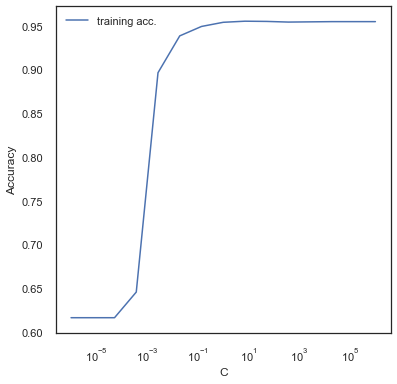

In [394]:
#lr_clf = LogisticRegression(solver='lbfgs', max_iter=250, random_state=123)
param_range = np.logspace(-6, 6, 15)
train_scores, valid_scores = validation_curve(
    logreg, X_train, y_train, 
    param_name="C", param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=-1, verbose=True,
)
# plot training v validation accuracy for different C's
_, ax = plt.subplots(figsize=(6, 6))
ax.semilogx(param_range, train_scores.mean(axis=1), label='training acc.')
#ax.semilogx(param_range, valid_scores.mean(axis=1), label='validation acc.')
ax.set_ylabel("Accuracy"), ax.set_xlabel("C")
plt.legend()
plt.show()

In [393]:
%%time
lr_clf = LogisticRegression(solver='lbfgs', max_iter=250, C=10, random_state=123)
lr_cv = cross_validate(logreg, X_train, y_train, cv=5, return_train_score=True,
                       scoring=['accuracy', 'roc_auc'], n_jobs=-1)

for metric in ['train_roc_auc', 'test_roc_auc', 'train_accuracy', 'test_accuracy']:
    metric_data = lr_cv.get(metric)
    print(f"{metric}: {metric_data}, {np.mean(metric_data):.5f} +- {np.std(metric_data):.3f}")

train_roc_auc: [0.98954514 0.99323157 0.99202933 0.99463732 0.98891052], 0.99167 +- 0.002
test_roc_auc: [0.68693908 0.62812797 0.63087319 0.62751391 0.67490372], 0.64967 +- 0.026
train_accuracy: [0.95112782 0.95864662 0.94736842 0.96745932 0.94493116], 0.95391 +- 0.008
test_accuracy: [0.68       0.635      0.63       0.62311558 0.68341709], 0.65031 +- 0.026
Wall time: 940 ms


In [497]:
# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Making predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [628]:
# Logistic regression scores
#print("Logistic regression score for Training set:", round(logreg.score(X_train, y_train),5))
#print("\nClassification report for Train set :")
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       381
           1       0.94      0.95      0.94       617

    accuracy                           0.93       998
   macro avg       0.93      0.92      0.92       998
weighted avg       0.93      0.93      0.93       998



In [629]:
# Logistic regression scores
#print("Logistic regression score for Test set:", round(logreg.score(X_test, y_test),5))
#print("\nClassification report for Test set :")
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56       161
           1       0.74      0.77      0.75       268

    accuracy                           0.69       429
   macro avg       0.66      0.66      0.66       429
weighted avg       0.68      0.69      0.68       429



In [600]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix for Test set: {}".format(model_name),fontsize=10)
    else:
        plt.title("Confusion Matrix for Test set",fontsize=20)
    plt.ylabel('True Label',fontsize=20)
    plt.xlabel('Predicted Label',fontsize=20)
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='red' if cf[i, j] > thresh else 'black')

    plt.colorbar()

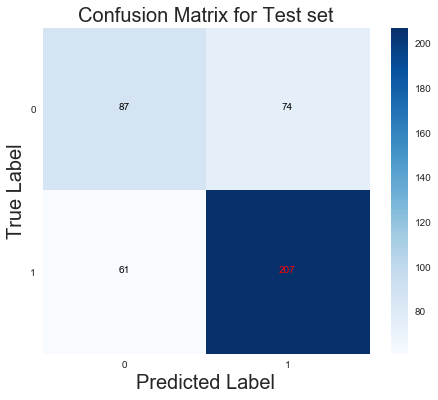

In [565]:
# Confusion matrix
plt.figure(figsize=(8,6))
plot_cf(y_test, y_hat_test)

AUC: 0.69401


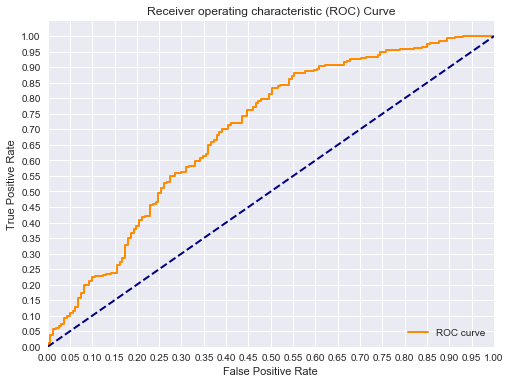

In [566]:
# Plotting the AUC-ROC
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The logistic regression model has a fairly good accuracy score of around 0.7 (weighted average F1 score), with similar results for the test and train set. However, it is worse at predicting failures compared to successes, and the recall rate (ability to correctly predict positives out of all of the actual positives in the data) is notably different between the failure and success categories. The AUC value is pretty high, and the curve is pulled towards the top left of the graph, which is a positive sign. 
However, this can probably be improved upon.

#### feature importance 

In [424]:
indices = np.argsort(-abs(logreg.coef_[0,:]))
print("The features in order of importance are:")
for i,feature in enumerate(X.columns[indices]):
    print(feature)
    if i==25:
        break

The features in order of importance are:
socialMedia
overallrating
teamSize
acceptingCurrency_BTC, ETH, LTC, Fiat
categories_Banking
categories_Platform,Banking
categories_Platform,Cryptocurrency,Business services,Internet
country_Isle of Man
country_British Virgin Islands
categories_Platform,Software
categories_Platform,Investment
categories_Business services
categories_Business services,Platform,Software
country_South Africa
categories_Business services,Infrastructure
start_day_Friday
start_month_March
country_Denmark
acceptingCurrency_BTC,ETH
country_Indonesia
categories_Platform
acceptingCurrency_ETH, BTC, Fiat
country_Serbia, France
acceptingCurrency_BTC, USD, ETH, LTC
country_Czech Republic
country_Poland


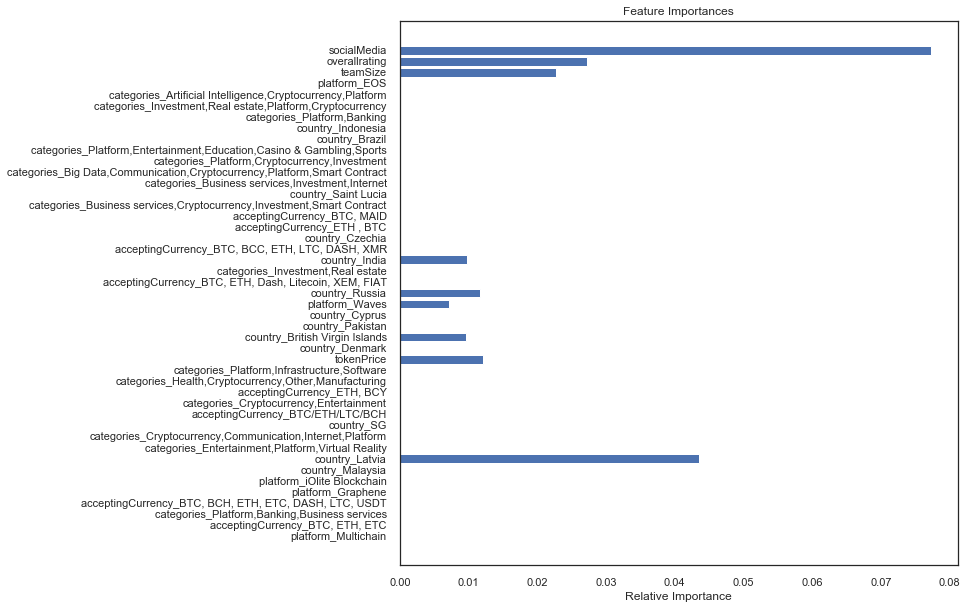

In [425]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
indices = np.argsort(feature_importance)


num_features = 45

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

##### PCA

Principal Component Analysis and feature weightings

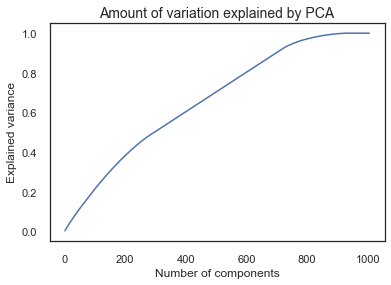

In [502]:
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

In [503]:
print("Number of components explaining 80% of variance:", np.where(explained_var > 0.8)[0][0])
print("Number of components explaining 90% of variance:", np.where(explained_var > 0.9)[0][0])
print("Number of components explaining 99% of variance:", np.where(explained_var > 0.99)[0][0])

Number of components explaining 80% of variance: 596
Number of components explaining 90% of variance: 696
Number of components explaining 99% of variance: 859


In [504]:
n_comps = [596,696,859]
for n in n_comps:
    pipe = Pipeline([('pca', PCA(n_components=n)), ('clf', LogisticRegression())])
    pipe.fit(X_train, y_train)
    print("\nNumber of components:", n)
    print("Score:", round(pipe.score(X_test, y_test),5))


Number of components: 596
Score: 0.7296

Number of components: 696
Score: 0.71795

Number of components: 859
Score: 0.68531


In [505]:
# Feature weightings on each component, in order of average weighting
pca = PCA(n_components=596)
pca.fit_transform(X)
pca_649_components = pd.DataFrame(pca.components_,columns=X.columns).T # Components as columns, features as rows
pca_649_components['mean_weight'] = pca_90_components.iloc[:].abs().mean(axis=1)
pca_649_components.sort_values('mean_weight', ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,mean_weight
"categories_Business services,Cryptocurrency,Legal",-0.002504,0.006829,-0.009749,-0.009553,0.023685,0.002767,-0.001000,0.001013,0.003215,-0.026817,0.003897,-0.002469,0.004762,0.020427,-0.001773,0.005433,0.009046,0.019597,0.004937,-0.023584,0.014441,-0.000927,0.023380,0.004244,0.006358,...,-0.022431,-0.079541,-0.005271,0.054697,0.021150,-0.117453,0.037868,-0.051139,-0.039054,0.020807,-0.009688,0.043687,0.072358,-0.010596,0.024503,-0.043454,-0.063114,-0.001137,-0.023591,-0.053606,-0.007853,0.056044,0.019649,-0.032381,0.024481
"categories_Platform,Cryptocurrency,Business services,Banking,Investment",-0.001218,0.000106,0.001166,0.001160,0.007224,0.010217,-0.008387,-0.011792,-0.004146,-0.012517,0.017381,-0.002305,0.036508,0.000850,-0.012180,-0.004740,0.001873,0.015137,-0.005010,0.004864,0.007022,-0.007558,-0.010625,-0.017309,0.009528,...,0.003307,0.043341,-0.084955,0.007210,0.028930,0.037915,-0.094694,0.014482,0.012621,0.023507,-0.040399,0.007645,-0.054564,0.029814,0.023006,0.042060,-0.041100,-0.076541,0.021600,-0.035390,0.015507,-0.041161,-0.016092,0.048291,0.024402
"categories_Cryptocurrency,Health,Software",-0.006826,-0.008612,-0.012945,0.019893,0.000127,-0.013020,0.002715,0.029976,-0.005326,-0.030328,-0.012778,0.005668,-0.002582,-0.000488,0.007565,-0.018546,0.004865,-0.020207,-0.011748,0.002338,0.007606,0.011702,0.011328,-0.009085,-0.003660,...,0.037890,-0.020412,0.020457,-0.000871,-0.025368,-0.058437,0.069699,0.026775,0.009452,0.034926,-0.016871,0.003288,0.054973,-0.040786,0.063950,-0.039613,-0.010569,0.000556,0.037157,0.041228,-0.038307,-0.039975,-0.011659,0.003229,0.024314
"categories_Artificial Intelligence,Health",0.000798,0.011656,0.027727,-0.014084,-0.016487,-0.000967,0.000838,0.010685,0.000717,0.018097,-0.001709,0.018041,0.004122,-0.020331,-0.003851,-0.024201,-0.008592,0.011548,-0.042187,0.006300,0.023041,-0.011053,0.006428,0.003496,-0.041671,...,0.036631,-0.042141,-0.051154,0.019187,0.021855,-0.026579,0.000352,0.030106,0.047343,-0.057985,0.076579,-0.051841,-0.019398,-0.059509,0.035712,-0.018088,0.055745,0.051835,-0.005109,0.001120,-0.045418,0.045866,0.036770,-0.095531,0.024080
"categories_Big Data,Health,Platform,Software",0.034006,-0.013296,-0.006357,0.026728,-0.009317,0.003004,-0.004928,0.030338,0.002972,-0.020752,0.000423,-0.008768,-0.023421,0.017942,0.003209,-0.001405,-0.006870,0.024417,0.016720,-0.020519,0.022603,-0.011623,0.001629,0.026941,0.002986,...,0.025671,-0.014916,-0.025827,0.044709,-0.016239,-0.011371,0.067273,0.060721,0.020942,0.067714,0.062489,0.028905,0.002834,0.034362,0.012281,-0.006323,0.073258,-0.003061,-0.030944,0.027832,-0.021544,0.013187,0.012417,0.016879,0.024020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"acceptingCurrency_BTC, ETH, BCH, Various",0.030057,-0.009795,-0.026630,0.036477,-0.002088,-0.020796,-0.008071,0.011955,0.000427,-0.009552,0.010992,0.034840,0.042088,0.009168,-0.017650,-0.059122,-0.026020,0.021605,0.033764,0.007917,0.025605,0.040974,-0.003811,-0.034308,0.084000,...,-0.000120,-0.000039,0.000461,-0.000132,0.000111,0.000017,0.000207,0.000355,-0.000165,-0.000397,-0.000710,0.000937,0.000003,-0.000135,0.000767,-0.000148,0.000059,-0.001917,-0.001413,-0.000007,-0.000868,0.000393,-0.000661,0.000096,0.004023
"acceptingCurrency_ETH, BTC, WIRE",0.029135,0.010444,0.031683,-0.030253,-0.017581,0.005020,-0.005841,0.017426,-0.017899,-0.043583,-0.018001,-0.014859,0.020792,-0.012418,-0.045004,-0.017610,0.029752,-0.019932,-0.014348,-0.045321,0.011940,-0.009043,-0.003637,-0.024169,-0.031396,...,0.000242,-0.000281,-0.000229,0.000037,0.000948,0.000345,0.000402,-0.000108,0.000421,-0.000022,-0.000845,-0.000032,0.000269,-0.000111,-0.000143,-0.000380,-0.000038,0.00005

The graph below plots the average weight of each feature on each component. It shows that there is relatively little variation between the average weights of each feature, i.e. how much each feature is included in each component.

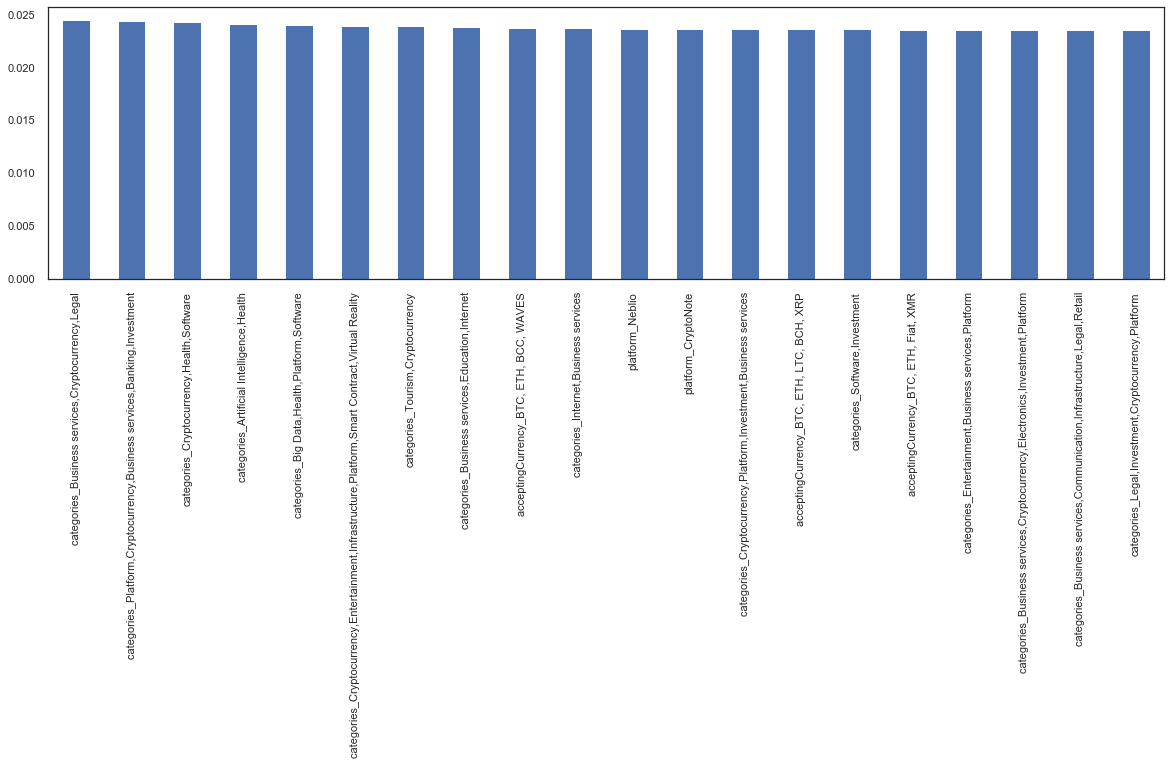

In [54]:
# Plotting feature importances
plt.figure(figsize=(20,5))
pca_649_components.mean_weight.sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

The tables below show the top 10 most important features in the top three most important components.

Component 1 - the top two features relate to the country a project is from, primarily the US and the UK (the top two most common countries).
Component 2 - the top two features relate to whether or not a project was highlighted as a staff pick.
Component 3 - the top two features relate to the timings of the project, specifically whether it was launched in October or had a deadline in November.

In [55]:
pca_649_components[0].map(lambda x : x).abs().sort_values(ascending = False)[:10]

platform_Ethereum                    0.390235
overallrating                        0.245045
platform_Waves                       0.238194
acceptingCurrency_BTC                0.229634
hardcap                              0.217200
platform_Bitcoin                     0.204280
video                                0.202150
teamSize                             0.190093
softcap                              0.183588
acceptingCurrency_BTC, ETH, WAVES    0.168217
Name: 0, dtype: float64

In [56]:
pca_649_components[1].map(lambda x : x).abs().sort_values(ascending = False)[:10]

platform_UNIVERSA                        0.359465
categories_Investment,Manufacturing      0.359465
country_Tanzania                         0.359465
acceptingCurrency_BTC, ETH, LTC, DASH    0.226255
platform_Ethereum                        0.218351
acceptingCurrency_ETH                    0.210810
teamSize                                 0.167520
overallrating                            0.140056
softcap                                  0.126559
video                                    0.124093
Name: 1, dtype: float64

In [57]:
pca_649_components[2].map(lambda x : x).abs().sort_values(ascending = False)[:10]

categories_Investment,Manufacturing             0.381638
country_Tanzania                                0.381638
platform_UNIVERSA                               0.381638
acceptingCurrency_BTC, ETH, LTC, DASH           0.224460
acceptingCurrency_BTC, ETH, BCH, Various        0.170768
categories_Communication,Entertainment,Media    0.170768
platform_Steem                                  0.170768
platform_Ethereum                               0.155903
acceptingCurrency_ETH                           0.135922
teamSize                                        0.132812
Name: 2, dtype: float64

### logistic regression with PCA and parameter optimisation

The logistic regression model can potentially be further improved by optimising its parameters. GridSearchCV can be used to test multiple different regularisation parameters (values of C), penalties (l1 or l2) and models with and without an intercept.

In [506]:
# Using GridSearchCV to test multiple different parameters
logreg_start = time.time()

pipe_logreg = Pipeline([('pca', PCA(n_components=596)),
                    ('clf', LogisticRegression())])

params_logreg = [
    {'clf__penalty': ['l1', 'l2'],
     'clf__fit_intercept': [True, False],
        'clf__C': [0.001, 0.01, 1, 10]
    }
]

grid_logreg = GridSearchCV(estimator=pipe_logreg,
                  param_grid=params_logreg,
                  cv=5)

grid_logreg.fit(X_train, y_train)

logreg_end = time.time()

logreg_best_score = grid_logreg.best_score_
logreg_best_params = grid_logreg.best_params_

print(f"Time taken to run: {round((logreg_end - logreg_start)/60,1)} minutes")
print("Best accuracy:", round(logreg_best_score,2))
print("Best parameters:", logreg_best_params)

C:\Users\PG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\PG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\PG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\PG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Est

C:\Users\PG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\PG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\PG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\PG\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Est

Time taken to run: 1.0 minutes
Best accuracy: 0.65
Best parameters: {'clf__C': 0.01, 'clf__fit_intercept': True, 'clf__penalty': 'l2'}


Logistic regression score for training set: 0.88878
Logistic regression score for test set: 0.71795

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.39      0.51       161
           1       0.71      0.91      0.80       268

    accuracy                           0.72       429
   macro avg       0.72      0.65      0.66       429
weighted avg       0.72      0.72      0.69       429



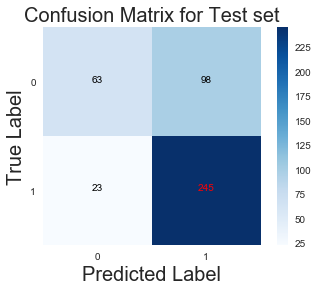

In [573]:
pipe_best_logreg = Pipeline([('pca', PCA(n_components=596)),
                    ('clf', LogisticRegression(C=0.01, fit_intercept=True, penalty='l2'))])

pipe_best_logreg.fit(X_train, y_train)

lr_y_hat_train = pipe_best_logreg.predict(X_train)
lr_y_hat_test = pipe_best_logreg.predict(X_test)

print("Logistic regression score for training set:", round(pipe_best_logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(pipe_best_logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, lr_y_hat_test))
plot_cf(y_test, lr_y_hat_test)

In [630]:
#print("Logistic regression score for Training set using PCA:", round(pipe_best_logreg.score(X_train, y_train),5))
#print("\nClassification report for Training set using PCA:")
print(classification_report(y_train, lr_y_hat_train))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       381
           1       0.88      0.95      0.91       617

    accuracy                           0.89       998
   macro avg       0.89      0.87      0.88       998
weighted avg       0.89      0.89      0.89       998



In [631]:
#print("Logistic regression score for Test set using PCA:", round(pipe_best_logreg.score(X_test, y_test),5))
#print("\nClassification report for Test set using PCA:")
print(classification_report(y_test, lr_y_hat_test))

              precision    recall  f1-score   support

           0       0.73      0.39      0.51       161
           1       0.71      0.91      0.80       268

    accuracy                           0.72       429
   macro avg       0.72      0.65      0.66       429
weighted avg       0.72      0.72      0.69       429



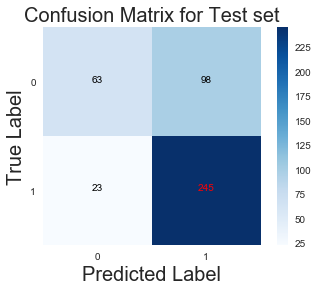

In [620]:
plot_cf(y_test, lr_y_hat_test)

In [623]:
confusion_matrix(y_test,lr_y_hat_test)

array([[ 63,  98],
       [ 23, 245]], dtype=int64)

After hyperparameter tuning, the model's accuracy score is the same as the logistic regression model using default parameters (0.70 weighted average F1 score).

AUC: 0.75


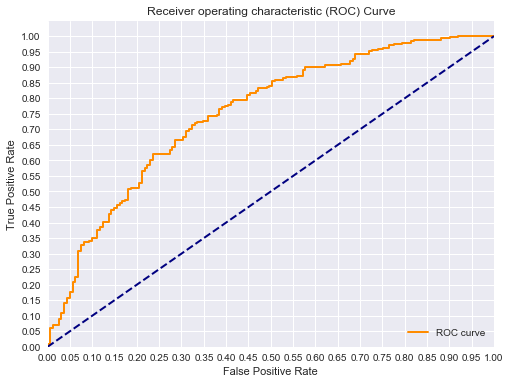

In [575]:
# Plotting the AUC-ROC
y_score = pipe_best_logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Model 2: Random Forests

A Random Forest model will now be fitted using the log-transformed data, but without using PCA. This is to allow for the construction of a list of feature importances.

In [554]:
from sklearn.model_selection import StratifiedKFold
total_trails=10
for i in range(total_trails):
    cross_val=StratifiedKFold(n_splits=4,shuffle=True,random_state=i)
    rf_tree=RandomForestClassifier()
    
    #hyper parameters tuning
    params_rf2 = [ {'n_estimators': [200, 400],'max_depth': [20, 35]}]
    
    grid_rf_tree=GridSearchCV(estimator=rf_tree, param_grid=params_rf2, cv=cross_val,scoring='recall_macro')
    grid_rf_tree.fit(X_train,y_train)
    
    print("tuned parameters :",grid_rf_tree.best_params_)
    print("accuracy of parameters:",grid_rf_tree.best_score_)
    

tuned parameters : {'max_depth': 35, 'n_estimators': 200}
accuracy of parameters: 0.6671218747473522
tuned parameters : {'max_depth': 35, 'n_estimators': 400}
accuracy of parameters: 0.6618664111249531
tuned parameters : {'max_depth': 35, 'n_estimators': 200}
accuracy of parameters: 0.6585009191784446
tuned parameters : {'max_depth': 35, 'n_estimators': 400}
accuracy of parameters: 0.6591269917829765
tuned parameters : {'max_depth': 35, 'n_estimators': 400}
accuracy of parameters: 0.6537535646300502
tuned parameters : {'max_depth': 35, 'n_estimators': 200}
accuracy of parameters: 0.6533220020818175
tuned parameters : {'max_depth': 35, 'n_estimators': 200}
accuracy of parameters: 0.6452585884156874
tuned parameters : {'max_depth': 35, 'n_estimators': 400}
accuracy of parameters: 0.6435172482617835
tuned parameters : {'max_depth': 35, 'n_estimators': 200}
accuracy of parameters: 0.6513386713208975
tuned parameters : {'max_depth': 35, 'n_estimators': 200}
accuracy of parameters: 0.6574626

In [555]:
# Using GridSearchCV to test multiple different parameters
rf_start2 = time.time()
rf_tree = RandomForestClassifier(min_samples_split=0.001, verbose=2)
#hyper parameters
params_rf_tree = [ {'n_estimators': [200, 400],'max_depth': [20, 35]}]

#grid search
grid_rf_tree = GridSearchCV(estimator=rf_tree, param_grid=params_rf2, cv=5)
grid_rf_tree.fit(X_train, y_train)

rf_end2 = time.time()
rf_best_score_tree = grid_rf_tree.best_score_
rf_best_params_tree = grid_rf_tree.best_params_

print(f"Time taken to run: {round((rf_end2 - rf_start2)/60,1)} minutes")
print("Best accuracy:", round(rf_best_score_tree,2))
print("Best parameters:", rf_best_params_tree)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 o

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.2s finished


Random Forest score for training set: 1.0
Random Forest score for test set: 0.7296

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.45      0.55       161
           1       0.73      0.89      0.80       268

    accuracy                           0.72       429
   macro avg       0.72      0.67      0.67       429
weighted avg       0.72      0.72      0.71       429



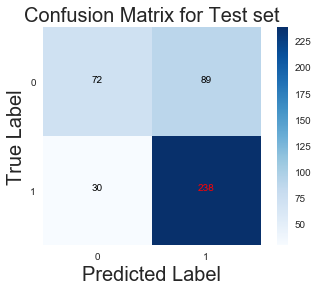

In [577]:
best_rf = RandomForestClassifier(max_depth=35, min_samples_split=0.001, n_estimators=400)

best_rf.fit(X_train, y_train)

rf_y_pred_train2 = best_rf.predict(X_train)
rf_y_pred_test2 = best_rf.predict(X_test)

print("Random Forest score for training set:", round(best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(best_rf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test2))
plot_cf(y_test, rf_y_hat_test2)

In [632]:
#print("Random Forest score for Training set:", round(best_rf.score(X_train, y_train),5))
#print("\nClassification report for Train set:")
print(classification_report(y_train, rf_y_pred_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       617

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998



In [633]:
#print("Random Forest score for Test set:", round(best_rf.score(X_test, y_test),5))
#print("\nClassification report for Test set:")
print(classification_report(y_test, rf_y_pred_test2))


              precision    recall  f1-score   support

           0       0.72      0.46      0.56       161
           1       0.73      0.89      0.80       268

    accuracy                           0.73       429
   macro avg       0.73      0.68      0.68       429
weighted avg       0.73      0.73      0.71       429



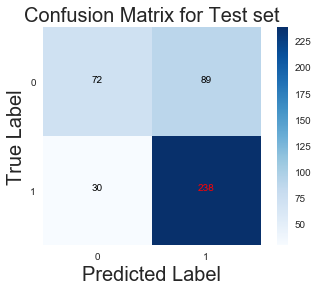

In [581]:
plot_cf(y_test, rf_y_hat_test2)

In [ ]:
##### best_rf_cv=cross_validate(best_rf, X_train_valid, y_train_valid, cv=10, return_train_score=True,
                            scoring=['accuracy', 'roc_auc'], n_jobs=-1)
for metric in ['train_roc_auc', 'test_roc_auc', 'train_accuracy', 'test_accuracy']:
    metric_data = xgb_model_cv.get(metric)
    print(rf"{metric}: {metric_data}, {np.mean(metric_data):.5f} +- {np.std(metric_data):.3f}")

By log-transforming features and increasing the number of trees created (n_estimators), it was possible to improve the weighted average F1 score to 0.74. Overfitting does not appear to be an issue.

Because PCA was not used, it was possible to plot feature importance (see graph below).

Goal size is the most important feature, followed by the number of days taken from project creation to launch, and whether or not the project was a staff pick.
Campaign length and name length were also fairly important.
Project type (category) was less important, although whether or not a project was a technology and food project does seem to be fairly important.
Launch and deadline time, day and month is not very important.
Country of origin is not very important.

AUC: 0.80764


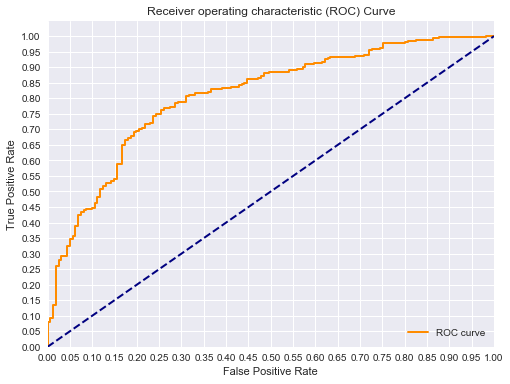

In [586]:
y_pred_proba = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')

print('AUC:', round(auc(fpr, tpr),5))

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

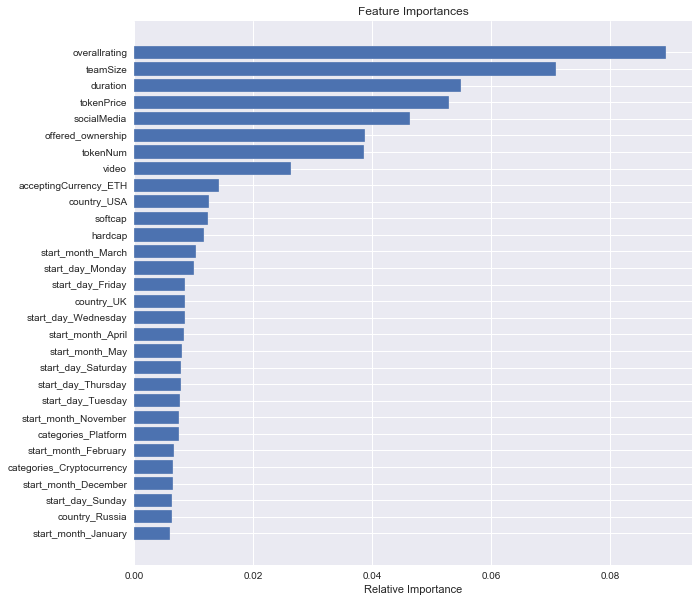

In [638]:
features = X_train.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 30

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

### random forest with pca 

In [512]:
# Random Forests with default settings
pipe_rf = Pipeline([('pca', PCA(n_components=596)),
                    ('clf', RandomForestClassifier())])
pipe_rf.fit(X_train, y_train)
print("Score:", round(pipe_rf.score(X_test, y_test),5))

Score: 0.69464


In [90]:
# Reporting the depths of each tree in the model created by the default Random Forest classifier, to get a sense of the
# maximum depth that a tree can be if depth is not limited, to help with choosing parameters to try with GridSearchCV
[estimator.tree_.max_depth for estimator in pipe_rf.named_steps['clf'].estimators_]

[14,
 15,
 19,
 15,
 14,
 18,
 19,
 20,
 17,
 15,
 14,
 14,
 20,
 14,
 14,
 14,
 19,
 14,
 13,
 15,
 13,
 11,
 16,
 16,
 19,
 14,
 17,
 16,
 15,
 14,
 15,
 18,
 12,
 16,
 17,
 15,
 17,
 14,
 16,
 13,
 13,
 16,
 12,
 12,
 17,
 17,
 20,
 14,
 15,
 15,
 17,
 14,
 14,
 18,
 14,
 17,
 18,
 15,
 13,
 14,
 14,
 17,
 17,
 13,
 13,
 14,
 16,
 16,
 14,
 14,
 20,
 17,
 21,
 14,
 16,
 14,
 14,
 17,
 11,
 16,
 16,
 16,
 19,
 12,
 18,
 17,
 15,
 14,
 14,
 16,
 13,
 19,
 15,
 14,
 16,
 15,
 15,
 15,
 15,
 16]

In [513]:
# Using GridSearchCV to test multiple different parameters
rf_start = time.time()

pipe_rf = Pipeline([('pca', PCA(n_components=596)),
                    ('clf', RandomForestClassifier())])

params_rf = [ 
  {'clf__n_estimators': [100],
   'clf__max_depth': [5, 15, 25],    
   'clf__min_samples_split':[0.001, 0.01]
  }
]

grid_rf = GridSearchCV(estimator=pipe_rf,
                  param_grid=params_rf,
                  cv=5)

grid_rf.fit(X_train, y_train)

rf_end = time.time()

rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("Best accuracy:", round(rf_best_score,2))
print("Best parameters:", rf_best_params)

Time taken to run: 0.9 minutes
Best accuracy: 0.65
Best parameters: {'clf__max_depth': 25, 'clf__min_samples_split': 0.001, 'clf__n_estimators': 100}


Random Forest score for training set: 1.0
Random Forest score for test set: 0.71096

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.41      0.52       161
           1       0.72      0.89      0.79       268

    accuracy                           0.71       429
   macro avg       0.71      0.65      0.65       429
weighted avg       0.71      0.71      0.69       429



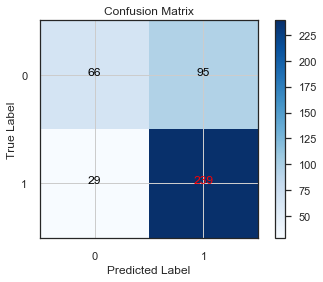

In [514]:
pipe_best_rf = Pipeline([('pca', PCA(n_components=282)),
                    ('clf', RandomForestClassifier(max_depth=25, min_samples_split=0.001, n_estimators=100))])

pipe_best_rf.fit(X_train, y_train)

rf_y_hat_train = pipe_best_rf.predict(X_train)
rf_y_hat_test = pipe_best_rf.predict(X_test)

print("Random Forest score for training set:", round(pipe_best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(pipe_best_rf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test))
plot_cf(y_test, rf_y_hat_test)

After hyperparameter tuning, the model's accuracy score has increased from 0.65 to 0.69 (weighted average f1 score). However, the difference between the accuracy score for the training set and the test set suggests there might be some over-fitting.

## Model 3: XGBoost

An XGBoost model will now be fitted using the log-transformed data, but without using PCA. This is to attempt to improve upon the Random Forest model, and to see whether the feature importances are similar.

C:\Users\PG\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost score for training set: 1.0
XGBoost score for test set: 0.75991

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       161
           1       0.78      0.86      0.82       268

    accuracy                           0.76       429
   macro avg       0.75      0.73      0.73       429
weighted avg       0.76      0.76      0.75       429



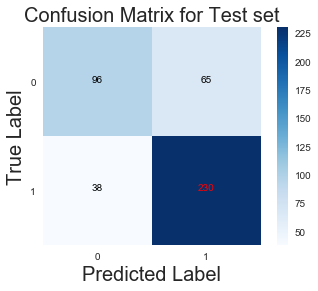

In [588]:
# Using GridSearchCV to test multiple different parameters
xgb_start2 = time.time()

xgb2 = xgb.XGBClassifier()
xgb2.fit(X_train, y_train)
xgb_y_hat_train2 = xgb2.predict(X_train)
xgb_y_hat_test2 = xgb2.predict(X_test)

print("XGBoost score for training set:", round(xgb2.score(X_train, y_train),5))
print("XGBoost score for test set:", round(xgb2.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, xgb_y_hat_test2))
plot_cf(y_test, xgb_y_hat_test2)


In [634]:
#print("XGBoost score for Training set:", round(xgb2.score(X_train, y_train),5))
#print("\nClassification report for Training set:")
print(classification_report(y_train, xgb_y_hat_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       617

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998



In [635]:
#print("XGBoost score for Test set:", round(xgb2.score(X_test, y_test),5))
#print("\nClassification report for Test set:")
print(classification_report(y_test, xgb_y_hat_test2))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65       161
           1       0.78      0.86      0.82       268

    accuracy                           0.76       429
   macro avg       0.75      0.73      0.73       429
weighted avg       0.76      0.76      0.75       429



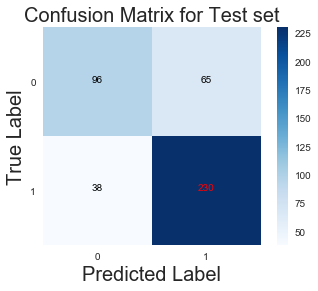

In [591]:
plot_cf(y_test, xgb_y_hat_test2)

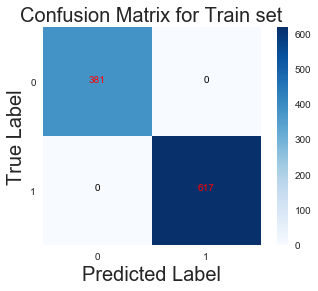

In [594]:
plot_cf(y_train, xgb_y_hat_train2)

In [465]:
print(classification_report(y_train, xgb_y_hat_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       363
           1       1.00      1.00      1.00       593

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956



In [627]:
r_cf = confusion_matrix(y_test, xgb_y_pred_test2)
print("Evaluation of the best model(XGBoost):")
print("\nIf the true value is failure, what proportion does the model correctly predict as a failure? \n(True negative rate/specificity):\n", 
      round(r_cf[0][0]/sum(r_cf[0]),4))
print("If the true value is success, what proportion does the model correctly predict as a success? \n(True positive rate/recall/sensitivity):\n", 
      round(r_cf[1][1]/sum(r_cf[1]),4))
print("\nIf the model predicts a failure, what proportion are actually failures? \n(Negative prediction value):\n", 
      round(r_cf[0][0]/sum(r_cf[:,0]),4))
print("If the model predicts a success, what proportion are actually successes? \n(Positive prediction value/precision):\n",
      round(r_cf[1][1]/sum(r_cf[:,1]),4))

Evaluation of the best model(XGBoost):

If the true value is failure, what proportion does the model correctly predict as a failure? 
(True negative rate/specificity):
 0.5963
If the true value is success, what proportion does the model correctly predict as a success? 
(True positive rate/recall/sensitivity):
 0.8582

If the model predicts a failure, what proportion are actually failures? 
(Negative prediction value):
 0.7164
If the model predicts a success, what proportion are actually successes? 
(Positive prediction value/precision):
 0.7797


In [275]:
import xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    learning_rate =0.1,
    n_estimators=150,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=123,
)

In [340]:
%%time
xgb_model_cv=cross_validate(xgb_model, X_train, y_train_valid, cv=5, return_train_score=True,
                        scoring=['accuracy', 'roc_auc'], n_jobs=-1)
for metric in ['train_roc_auc', 'test_roc_auc', 'train_accuracy', 'test_accuracy']:
    metric_data = xgb_model_cv.get(metric)
    print(rf"{metric}: {metric_data}, {np.mean(metric_data):.5f} +- {np.std(metric_data):.3f}")

train_roc_auc: [0.99727095 0.99706459 0.99595376 0.99809216 0.99827792], 0.99733 +- 0.001
test_roc_auc: [0.77833653 0.75958524 0.73740053 0.75298773 0.75831718], 0.75733 +- 0.013
train_accuracy: [0.97173913 0.97937025 0.96959826 0.9815418  0.97502714], 0.97546 +- 0.004
test_accuracy: [0.72294372 0.6826087  0.6826087  0.73913043 0.70434783], 0.70633 +- 0.022
Wall time: 11 s


In [339]:
%%time
xgb_clf = XGBClassifier(
    n_estimators=200, learning_rate=0.05, reg_lambda=0.316, reg_alpha=0.0178,
    random_state=123, n_jobs=-1,
)

xgb_model_cv=cross_validate(xgb_clf, X_train_valid, y_train_valid, cv=5, return_train_score=True,
                            scoring=['accuracy', 'roc_auc'], n_jobs=-1)
for metric in ['train_roc_auc', 'test_roc_auc', 'train_accuracy', 'test_accuracy']:
    metric_data = xgb_model_cv.get(metric)
    print(rf"{metric}: {metric_data}, {np.mean(metric_data):.5f} +- {np.std(metric_data):.3f}")

train_roc_auc: [0.99911381 0.99450616 0.99767781 0.99782607 0.99881513], 0.99759 +- 0.002
test_roc_auc: [0.80483716 0.76714091 0.73410498 0.75904393 0.74733527], 0.76249 +- 0.024
train_accuracy: [0.98152174 0.95439739 0.97502714 0.97068404 0.97937025], 0.97220 +- 0.010
test_accuracy: [0.74458874 0.69130435 0.7        0.72173913 0.71304348], 0.71414 +- 0.018
Wall time: 24.2 s


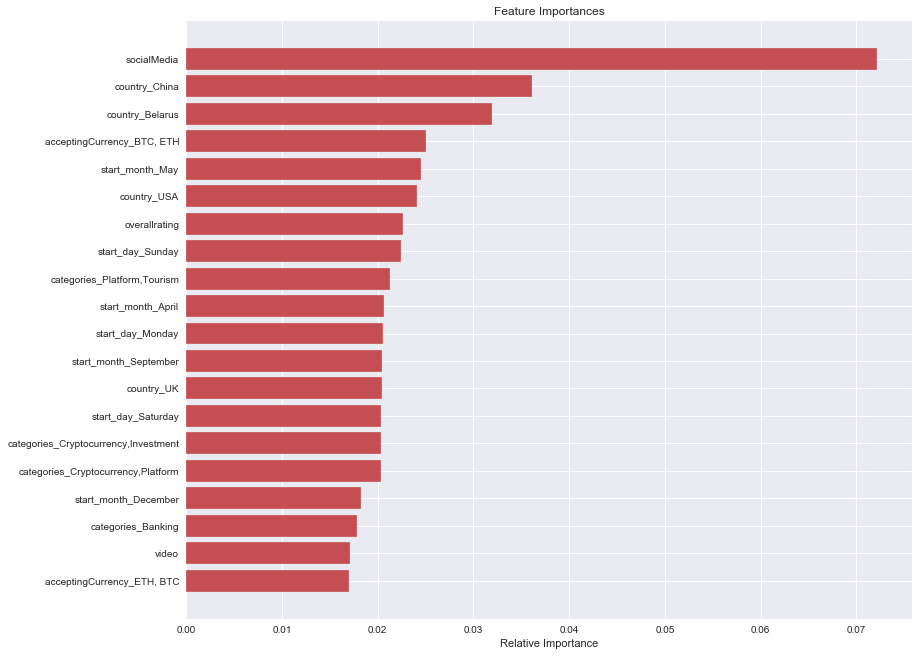

In [642]:
features = X_train.columns
importances = xgb2.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 20

plt.figure(figsize=(13,11))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='r', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [595]:
# Calculate ROC curve from y_test and pred
# Get just the prediction for the positive class (1)
y_pred_proba = xgb2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

AUC: 0.81582


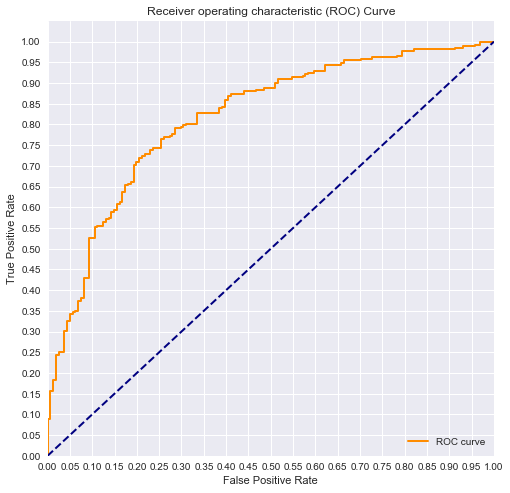

In [597]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

print('AUC:', round(auc(fpr, tpr),5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Model-4 Descision Trees

In [605]:
from sklearn.model_selection import StratifiedKFold
total_trails=5
for i in range(total_trails):
    cross_val=StratifiedKFold(n_splits=4,shuffle=True,random_state=i)
    dec_tree=DecisionTreeClassifier()
    
    #hyper parameters tuning
    tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
    best_dec_tree=GridSearchCV(dec_tree,tuned_params,cv=cross_val,scoring='recall_macro')
    best_dec_tree.fit(X_train,y_train)
    
    print("tuned parameters :",best_dec_tree.best_params_)
    print("accuracy of parameters:",best_dec_tree.best_score_)
    

KeyboardInterrupt: 

In [608]:
best_dec_model=DecisionTreeClassifier(max_depth=6,min_samples_leaf=2, min_samples_split=7)
best_dec_model.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [609]:
best_dec_model.best_estimator_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_estimator_'

DecisionTree score for training set: 0.77655
DecisionTree score for test set: 0.71562

Classification report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       161
           1       0.76      0.79      0.78       268

    accuracy                           0.72       429
   macro avg       0.70      0.69      0.69       429
weighted avg       0.71      0.72      0.71       429



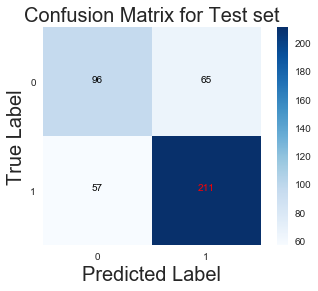

In [616]:
y_train_pred = best_dec_model.predict(X_train)
y_pred = best_dec_model.predict(X_test)
y_pred_proba = best_dec_model.predict_proba(X_test)[:,1]
print("DecisionTree score for training set:", round(best_dec_model.score(X_train, y_train),5))
print("DecisionTree score for test set:", round(best_dec_model.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_pred))
plot_cf(y_test, y_pred)

In [636]:
#print("DecisionTree score for Training set:", round(best_dec_model.score(X_train, y_train),5))
#print("\nClassification report on Train set:")
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       381
           1       0.83      0.80      0.82       617

    accuracy                           0.78       998
   macro avg       0.76      0.77      0.77       998
weighted avg       0.78      0.78      0.78       998



In [637]:
#print("DecisionTree score for Test set:", round(best_dec_model.score(X_test, y_test),5))
#print("\nClassification report for Test set:")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61       161
           1       0.76      0.79      0.78       268

    accuracy                           0.72       429
   macro avg       0.70      0.69      0.69       429
weighted avg       0.71      0.72      0.71       429



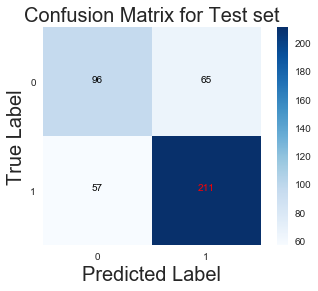

In [613]:
plot_cf(y_test, y_pred)

In [617]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

AUC: 0.7333


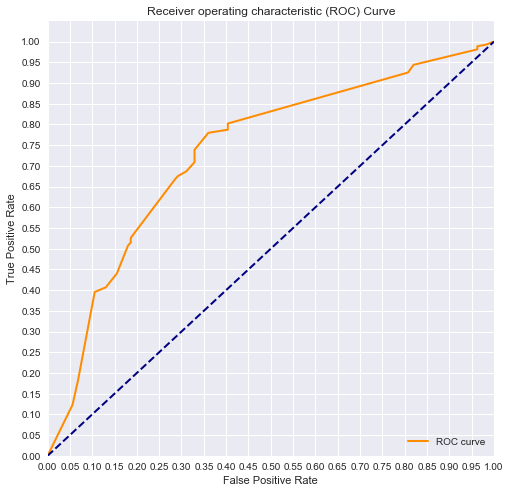

In [618]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

print('AUC:', round(auc(fpr, tpr),5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

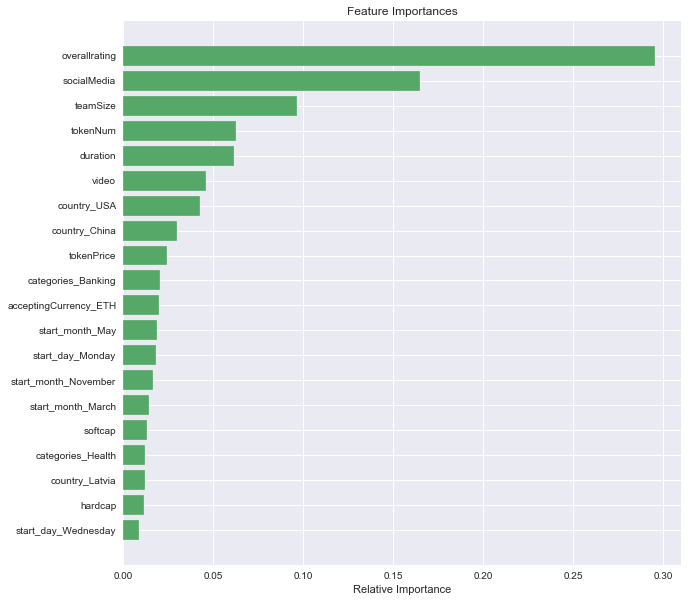

In [643]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=7, min_samples_leaf=2, max_depth=6)
model.fit(X_train, y_train)

features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 20

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='g', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
xgb_start2 = time.time()

xgb2 = xgb.XGBClassifier()
xgb2.fit(X_train, y_train)
xgb_y_pred_train2 = xgb2.predict(X_train)
xgb_y_pred_test2 = xgb2.predict(X_test)

print("XGBoost score for training set:", round(xgb2.score(X_train, y_train),5))
print("XGBoost score for test set:", round(xgb2.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, xgb_y_hat_test2))
plot_cf(y_test, xgb_y_hat_test2)